# Generate forcing in eWaterCycle with ESMValTool: CMIP6

This notebooks shows how to generate forcing data for PCR-GLOBWB model using ERA5 data and [ESMValTool hydrological recipes](https://docs.esmvaltool.org/en/latest/recipes/recipe_hydrology.html#pcr-globwb). More information about data, configuration and installation instructions can be found in the [System setup](https://ewatercycle.readthedocs.io/en/latest/system_setup.html) in the eWaterCycle documentation.

In [1]:
import logging
import warnings
from pathlib import Path
warnings.filterwarnings("ignore", category=UserWarning)

logger = logging.getLogger("esmvalcore")
logger.setLevel(logging.WARNING)

In [2]:
import xarray as xr
from rich import print

import ewatercycle.forcing

Forcing for PCRGlobWB is created using the ESMValTool recipe. It produces one file per each variable: temperature, and precipitation. You can set the start and end date, and the region. See [eWaterCycle documentation](https://ewatercycle.readthedocs.io/en/latest/apidocs/ewatercycle.forcing.html#submodules) for more information. 

#### Bug:
A shape file needs to be provided to delineate the area of interest. However, the forcing generated in this way will fill a bounding box that is "tight" around the shapefile. PCRGlobWB needs forcing files to be (slightly) larger than the extend of the clonemap. We fix this with "esmavaltool_padding below. Furhtermore, the number of pixels in the lat and lon directions need to be even for the interpolation algorithm that converts forcing data to the grid of the model. Therefore, we use the extract region and hard-code the extend of Great Brittain.

In [3]:
experiment_start_date="2025-08-01T00:00:00Z"
experiment_end_date="2030-08-31T00:00:00Z"

In [4]:
cmip_dataset =  {
    'project': 'CMIP6',
    'activity': 'ScenarioMIP',
    'exp': 'ssp585',
    'mip': 'day',
    'dataset': 'MPI-ESM1-2-HR',
    'ensemble': 'r1i1p1f1',
    'institute': 'DKRZ',
    'grid': 'gn'
}

In [5]:
# # option two: load data that you or someone else generated previously
prepared_forcing_path_caravan_central = Path("/home/emol/forcing/caravan/hysets_09488650")
camelsgb_forcing = ewatercycle.forcing.sources['CaravanForcing'].load(directory=prepared_forcing_path_caravan_central)

In [6]:
esmvaltool_padding = 6

pcrglobwb_forcing = ewatercycle.forcing.sources["PCRGlobWBForcing"].generate(
    dataset= cmip_dataset,
    start_time="2025-08-01T00:00:00Z",
    end_time="2030-08-31T00:00:00Z",
    start_time_climatology="2025-08-01T00:00:00Z",
    end_time_climatology="2025-08-01T00:00:00Z",
    shape=camelsgb_forcing.shape,
    extract_region={
    "start_longitude": -116-esmvaltool_padding,
    "end_longitude": -110+esmvaltool_padding,
    "start_latitude": 25-esmvaltool_padding,
    "end_latitude": 34+esmvaltool_padding,},
    directory = "/home/emol/forcing/csonoran_desert"

)

In [7]:
print(pcrglobwb_forcing)

PCRGlobWBForcing(
    start_time='2025-08-01T00:00:00Z',
    end_time='2030-08-31T00:00:00Z',
    directory=PosixPath('/home/emol/forcing/csonoran_desert/work/diagnostic/script'),
    shape=PosixPath('/home/emol/forcing/caravan/hysets_09488650/hysets_09488650.shp'),
    filenames={},
    precipitationNC='pcrglobwb_CMIP6_MPI-ESM1-2-HR_day_ssp585_r1i1p1f1_pr_gn_2025-2030_hysets_09488650.nc',
    temperatureNC='pcrglobwb_CMIP6_MPI-ESM1-2-HR_day_ssp585_r1i1p1f1_tas_gn_2025-2030_hysets_09488650.nc'
)

### Plot forcing

<xarray.Dataset> Size: 5MB
Dimensions:    (time: 2556, lat: 23, lon: 20, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 20kB 2024-01-02 2024-01-03 ... 2030-12-31
  * lat        (lat) float32 92B 39.74 38.81 37.87 36.94 ... 21.04 20.1 19.17
  * lon        (lon) float32 80B -121.9 -120.9 -120.0 ... -105.9 -105.0 -104.1
    height     float64 8B 2.0
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 5MB 279.9 278.3 275.6 ... 300.1 296.9
    time_bnds  (time, bnds) datetime64[ns] 41kB 2024-01-01T12:00:00 ... 2030-...
    lat_bnds   (lat, bnds) float32 184B 40.21 39.27 39.27 ... 19.64 19.64 18.7
    lon_bnds   (lon, bnds) float32 160B -122.3 -121.4 -121.4 ... -104.5 -103.6
Attributes: (12/46)
    Conventions:            CF-1.7
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60265.0
    branch_time_in_parent:  60265.0
    cmor_version:           3.4.0
    ...                     ...
    table_id:               day
    table_info:             Creation Date:(09 May 2019) MD5:e6ef8ececc8f33864...
    title:                  MPI-ESM1-2-HR output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f1
    caption:                Forcings for the PCR-GLOBWB hydrological model.

------------------------

<xarray.Dataset> Size: 5MB
Dimensions:    (time: 2556, lat: 23, lon: 20, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 20kB 2024-01-02 2024-01-03 ... 2030-12-31
  * lat        (lat) float32 92B 39.74 38.81 37.87 36.94 ... 21.04 20.1 19.17
  * lon        (lon) float32 80B -121.9 -120.9 -120.0 ... -105.9 -105.0 -104.1
Dimensions without coordinates: bnds
Data variables:
    pr         (time, lat, lon) float32 5MB 1.182e-16 1.182e-16 ... 1.23e-16
    time_bnds  (time, bnds) datetime64[ns] 41kB 2024-01-01T12:00:00 ... 2030-...
    lat_bnds   (lat, bnds) float32 184B 40.21 39.27 39.27 ... 19.64 19.64 18.7
    lon_bnds   (lon, bnds) float32 160B -122.3 -121.4 -121.4 ... -104.5 -103.6
Attributes: (12/46)
    Conventions:            CF-1.7
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60265.0
    branch_time_in_parent:  60265.0
    cmor_version:           3.4.0
    ...                     ...
    table_id:               day
    table_info:             Creation Date:(09 May 2019) MD5:e6ef8ececc8f33864...
    title:                  MPI-ESM1-2-HR output prepared for CMIP6
    variable_id:            pr
    variant_label:          r1i1p1f1
    caption:                Forcings for the PCR-GLOBWB hydrological model.

------------------------

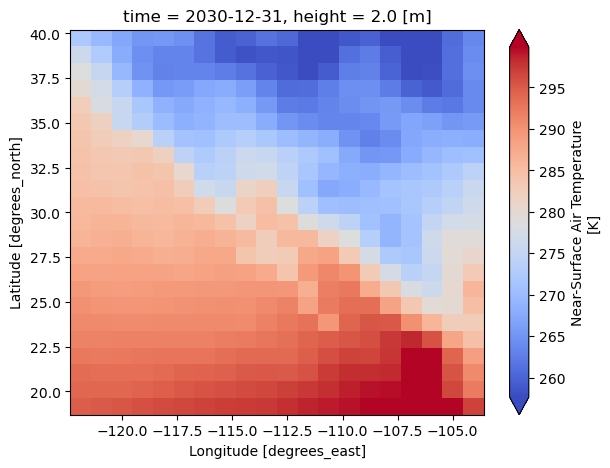

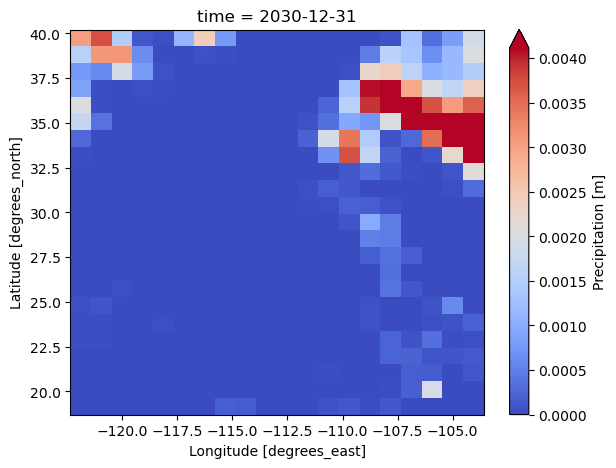

In [8]:
for file_name in [pcrglobwb_forcing.temperatureNC, pcrglobwb_forcing.precipitationNC]:
    dataset = xr.load_dataset(f"{pcrglobwb_forcing.directory}/{file_name}")
    print(dataset)
    print("------------------------")
    var = list(dataset.data_vars.keys())[0]
    dataset[var].isel(time=-1).plot(cmap="coolwarm", robust=True, size=5)